# Notebook Setup

In [20]:
import pandas as pd

# Loading Data

In [21]:
my_game_data = pd.read_csv("my_game_data.csv")

In [22]:
my_game_data

,Name,Sorting Name,Age Rating,Categories,Description,Developers,Publishers,Favorite,Hidden,Features,...,Platforms,Play Count,Time Played,Sources,Series,Tags,Community Score,Critic Score,User Score,Id
0,Black Desert,NaN,PEGI 16,NaN,"<h2 class=""bb_tag"">Go Beyond Limits : WORLD CL...",Pearl Abyss,Pearl Abyss,True,False,"Co-Operative, Massively Multiplayer Online (MM...",...,PC (Windows),0.0,8635500,Steam,NaN,NaN,68.0,75.0,4.0,14ea01b9-748e-488e-8ae9-f40fbbab4647
1,Fortnite,NaN,PEGI 12,NaN,Fortnite is the completely free online game wh...,Epic Games,Epic Games,True,False,"Battle Royale, Co-Operative, Multiplayer, Sing...",...,PC (Windows),0.0,3767248,Epic,NaN,NaN,71.0,83.0,4.0,89ed85f5-f162-4727-91ba-54f672985cbb
2,Rocket League,NaN,PEGI 3,NaN,Rocket League is a high-powered hybrid of arca...,Psyonix,Psyonix,False,False,"Co-Operative, Multiplayer, Single Player, Spli...",...,PC (Windows),0.0,3310528,Epic,Supersonic Acrobatic Rocket-Powered Battle-Cars,NaN,82.0,89.0,3.0,06119bc0-dddd-4f5a-8de3-35bf90322b0a
3,Counter-Strike 2,Counter-Strike 02,PEGI 18,NaN,"For over two decades, Counter-Strike has offer...","Hidden Path Entertainment, Valve",Valve,False,False,Multiplayer,...,PC (Windows),0.0,1974180,Steam,Counter-Strike,NaN,82.0,81.0,3.0,eacfc326-f129-422f-8f76-2a2be7d50ae4
4,Call of Duty: Advanced Warfare,NaN,PEGI 18,NaN,Call of Duty: Advanced Warfare envisions the p...,Sledgehammer Games,"Activision, Square Enix",False,False,"Co-Operative, Multiplayer, Single Player, Spli...",...,Sony PlayStation 4,698.0,1741669,PlayStation,Call of Duty,NaN,72.0,80.0,3.0,78c97c7e-dfc2-4626-b2e4-593363e43e04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,World of Goo,NaN,PEGI 3,NaN,World of Goo is a multiple award winning physi...,2D Boy,"2D Boy, Brighter Minds, Microsoft Game Studios...",False,False,"Co-Operative, Single Player",...,PC (Windows),0.0,0,Epic,World of Goo,NaN,80.0,87.0,NaN,4f76dff6-c98a-4366-a0c6-80d5c20f555e
378,YouTube,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,...,Sony PlayStation 4,0.0,0,PlayStation,NaN,NaN,NaN,NaN,NaN,8a2d6e11-8c03-4fef-bcb5-f2aba6755f0b
379,Yupp TV,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,...,Sony PlayStation 4,0.0,0,PlayStation,NaN,NaN,NaN,NaN,NaN,5698a643-6ff6-4c3f-8d0c-7eb2aa4a262b
380,Z1 Battle Royale,NaN,PEGI 16,NaN,"Z1 Battle Royale is a Free to Play, fast-paced...",Daybreak Game Company,Daybreak Game Company,False,False,Battle Royale,...,NaN,0.0,0,Steam,H1Z1,NaN,73.0,66.0,NaN,6f2930ca-1f6f-4d01-b65c-5eb62dd0d5e7


# Exploratary data analysis

In [23]:
my_game_data.columns

Index(['Name', 'Sorting Name', 'Age Rating', 'Categories', 'Description',
       'Developers', 'Publishers', 'Favorite', 'Hidden', 'Features', 'Game Id',
       'Genres', 'Install size', 'Release Date', 'Added', 'Last Played',
       'Date Modified', 'Recent Activity', 'Platforms', 'Play Count',
       'Time Played', 'Sources', 'Series', 'Tags', 'Community Score',
       'Critic Score', 'User Score', 'Id'],
      dtype='object')

In [31]:
my_game_data.dtypes

Name                       object
Sorting Name               object
Age Rating                 object
Categories                float64
Description                object
Developers                 object
Publishers                 object
Favorite                     bool
Hidden                       bool
Features                   object
Game Id                    object
Genres                     object
Install size              float64
Release Date       datetime64[ns]
Added                      object
Last Played                object
Date Modified              object
Recent Activity            object
Platforms                  object
Play Count                float64
Time Played                 int64
Sources                    object
Series                     object
Tags                      float64
Community Score           float64
Critic Score              float64
User Score                float64
Id                         object
dtype: object

<module 'matplotlib.pyplot' from 'C:\\Users\\ibrah\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\matplotlib\\pyplot.py'>

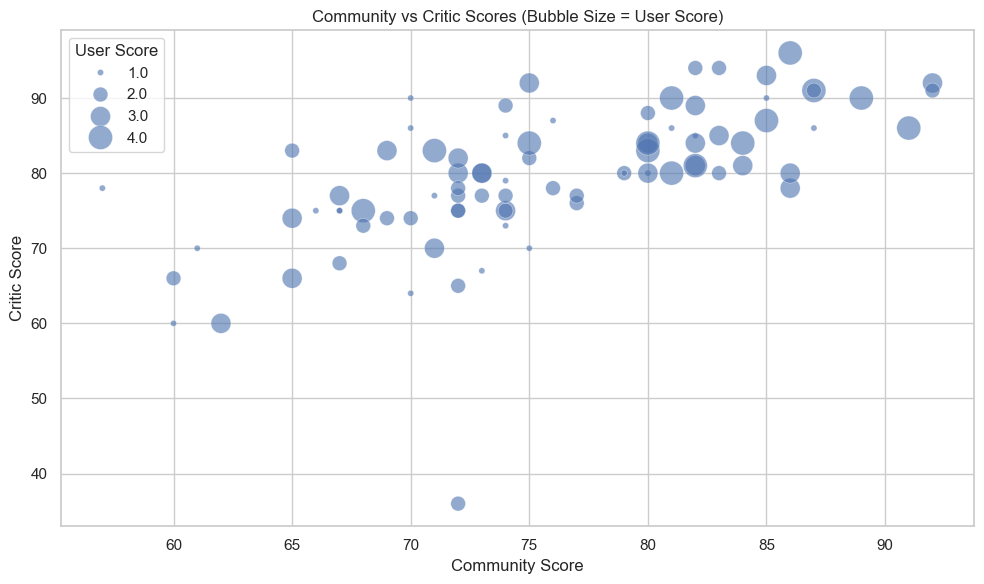

In [30]:
plot_rating_comparison(my_game_data)

# Data Manipulation

In [156]:
genres_series = my_game_data['Genres'].dropna()

all_genres = genres_series.str.split(',').explode().str.strip()

unique_genres_df = pd.DataFrame({'Genre': all_genres.unique()})
unique_genres_df = unique_genres_df.sort_values(by='Genre').reset_index(drop=True)

unique_genres_df


,Genre
0,Adventure
1,Arcade
2,Card & Board Game
3,Fighting
4,Hack and slash/Beat 'em up
5,Indie
6,MOBA
7,Music
8,Platform
9,Point-and-click


In [389]:
Features_series = my_game_data['Features'].dropna()

all_Features = Features_series.str.split(',').explode().str.strip()

unique_Features_df = pd.DataFrame({'Feature': all_Features.unique()})
unique_Features_df = unique_Features_df.sort_values(by='Feature').reset_index(drop=True)

unique_Features_df


,Feature
0,Battle Royale
1,Co-Operative
2,Massively Multiplayer Online (MMO)
3,Multiplayer
4,Single Player
5,Split Screen


In [390]:
unique_Features_df.to_csv('unique_features_df.csv')

In [368]:
unique_genres_df.to_csv('unique_genres_df.csv')

# Functions

In [318]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os

def platform_distribution(df, icon_path='icons'):
    # Map source names to icon files
    source_icon_map = {
        "Steam": "steam.png",
        "Epic": "epic.png",
        "PlayStation": "psn.png",
        "Battle.net": "battlenet.png",
        "Riot Games": "riot.png"
    }
    zoom_levels = {
        "Steam": 0.03,
        "Epic": 0.04,
        "PlayStation": 0.02,
        "Battle.net": 0.035,
        "Riot Games": 0.035
    }

    df_sources = df.dropna(subset=["Sources"])
    df_sources = df_sources.assign(Sources=df_sources["Sources"].str.split(', '))
    source_counts = df_sources.explode("Sources")["Sources"].value_counts()
    total = source_counts.sum()

    fig, ax = plt.subplots(figsize=(14, 2))
    left = 0
    colors = plt.cm.Dark2.colors

    for i, (source, count) in enumerate(source_counts.items()):
        bar_color = colors[i % len(colors)]
        ax.barh(0, count, left=left, label=source, color=bar_color)

        icon_file = source_icon_map.get(source)
        if icon_file:
            icon_path_full = os.path.join(icon_path, icon_file)
            if os.path.exists(icon_path_full):
                img = plt.imread(icon_path_full)
                zoom = zoom_levels.get(source, 0.05)
                imagebox = OffsetImage(img, zoom=zoom)
                ab = AnnotationBbox(imagebox, (left + count / 2, 0), frameon=False)
                ax.add_artist(ab)

        # Format label
        if source in ["Battle.net", "Riot Games"]:
            label = f"{(count / total * 100):.0f}"
        else:
            label = f"{(count / total * 100):.0f}%"

        ax.text(left + count / 2, -0.25, label,
                ha='center', va='top', color='white', fontsize=10, fontweight='bold')

        left += count

    ax.xaxis.set_visible(True)
    ax.tick_params(axis='x', colors='white')
    ax.set_yticks([])

    fig.patch.set_facecolor('#262730')
    ax.set_facecolor('#262730')
    ax.set_xlim(0, left)

    leg = ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, -0.2),
        ncol=len(source_counts),
        frameon=False,
    )
    leg.get_frame().set_facecolor('#262730')
    for text in leg.get_texts():
        text.set_color('white')

    plt.subplots_adjust(bottom=0.3)
    plt.tight_layout()

    return plt


In [369]:
import matplotlib.pyplot as plt

def plot_top_5_genres_with_custom_title(game_df, unique_genres_df, top_n=10):
    
    # Count games per genre
    genre_counts = []
    for genre in unique_genres_df['Genre']:
        count = game_df['Genres'].dropna().str.contains(genre, case=False, na=False).sum()
        genre_counts.append((genre, count))
    
    # Top N genres sorted descending
    genre_counts = sorted(genre_counts, key=lambda x: x[1], reverse=True)[:top_n]
    
    # Add space between genre and count
    labels = [f"{genre}         {count} Games" for genre, count in genre_counts]
    counts = [count for _, count in genre_counts]
    
    fig, ax = plt.subplots(figsize=(8, 5))
    fig.patch.set_facecolor('#262730')
    ax.set_facecolor('#262730')
    
    # Add left-aligned title as text
    ax.text(0, 1.05, "Top 10 Genres", fontsize=18, fontweight='bold', color='white',
            transform=ax.transAxes, ha='left', va='bottom')
    
    ax.barh(labels, counts, color='#e646f5', height=0.2)
    ax.invert_yaxis()
    
    ax.tick_params(axis='y', colors='white', labelsize=12)
    ax.xaxis.set_visible(False)
    for spine in ['top', 'right', 'bottom', 'left']:
        ax.spines[spine].set_visible(False)
    ax.grid(axis='y', visible=False)
    
    plt.show()


In [335]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_games_over_time(game_df):
    # Ensure Release Date is datetime
    game_df['Release Date'] = pd.to_datetime(game_df['Release Date'], errors='coerce')
    
    # Drop rows with invalid dates
    game_df = game_df.dropna(subset=['Release Date'])
    
    # Extract year
    game_df['Year'] = game_df['Release Date'].dt.year
    
    # Count games per year
    counts_per_year = game_df.groupby('Year').size().reset_index(name='Count')
    
    fig, ax = plt.subplots(figsize=(8, 5))
    fig.patch.set_facecolor('#262730')   # figure background color
    ax.set_facecolor('#262730')          # axes background color
    
    # Plot line graph
    ax.plot(counts_per_year['Year'], counts_per_year['Count'], 
            color='#e646f5', linewidth=2.5, marker='o')
    
    # Centered title
    ax.text(0.5, 1.05, "Game release dates", fontsize=18, fontweight='bold', color='white',
            transform=ax.transAxes, ha='center', va='bottom')
    
    # Style ticks and spines
    ax.tick_params(axis='x', colors='white', rotation=45)
    ax.tick_params(axis='y', colors='white')
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('white')
    
    # Remove all gridlines
    ax.grid(False)
    
    plt.tight_layout()
    plt.show()


In [340]:
import matplotlib.pyplot as plt

def plot_top_10_games_by_time_played(game_df, top_n=10):
    # Drop rows with missing Time Played or Name
    df = game_df.dropna(subset=['Time Played', 'Name'])
    
    # Sort descending by Time Played and select top N
    top_games = df.sort_values(by='Time Played', ascending=False).head(top_n)
    
    # Format labels with spaces between game name and time played (in hours for readability)
    labels = [f"{name}         {time_played/3600:.1f} hrs" for name, time_played in zip(top_games['Name'], top_games['Time Played'])]
    counts = top_games['Time Played'].tolist()
    
    fig, ax = plt.subplots(figsize=(8, 5))
    fig.patch.set_facecolor('#262730')
    ax.set_facecolor('#262730')
    
    # Add left-aligned title
    ax.text(0, 1.05, "Top 10 Games by Time Played", fontsize=18, fontweight='bold', color='white',
            transform=ax.transAxes, ha='left', va='bottom')
    
    ax.barh(labels, counts, color='#e646f5', height=0.2)
    ax.invert_yaxis()
    
    ax.tick_params(axis='y', colors='white', labelsize=12)
    ax.xaxis.set_visible(False)
    for spine in ['top', 'right', 'bottom', 'left']:
        ax.spines[spine].set_visible(False)
    ax.grid(axis='y', visible=False)
    
    plt.show()


In [373]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top_5_genres_star(game_df, unique_genres_df, top_n=5):
    # Count games per genre
    genre_counts = []
    for genre in unique_genres_df['Genre']:
        count = game_df['Genres'].dropna().str.contains(genre, case=False, na=False).sum()
        genre_counts.append((genre, count))

    # Top N genres sorted descending
    genre_counts = sorted(genre_counts, key=lambda x: x[1], reverse=True)[:top_n]
    genres = [g for g, c in genre_counts]
    counts = np.array([c for g, c in genre_counts])
    
    # Normalize counts for better radar plot scaling (optional)
    max_count = counts.max()
    counts_norm = counts / max_count
    
    # Number of variables
    num_vars = len(genres)
    
    # Compute angle for each axis in the plot (split the circle into equal parts)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Repeat the first value to close the circular graph
    counts_norm = np.concatenate((counts_norm, [counts_norm[0]]))
    angles += angles[:1]
    
    # Setup figure and polar axis
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    fig.patch.set_facecolor('#262730')
    ax.set_facecolor('#262730')
    
    # Draw the outline of the radar chart
    ax.plot(angles, counts_norm, color='#e646f5', linewidth=2, linestyle='solid')
    ax.fill(angles, counts_norm, color='#e646f5', alpha=0.25)
    
    # Set the category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(genres, color='white', fontsize=12)
    
    # Set the range for the radial axis (0 to 1 because of normalization)
    ax.set_ylim(0, 1)
    
    # Customize grid and labels
    ax.tick_params(colors='lightgrey')
    ax.yaxis.grid(True, color='grey', linestyle='dashed', alpha=0.3)
    ax.xaxis.grid(False)
    
    # Remove radial labels (0.2, 0.4, etc.) or keep them styled
    ax.set_yticklabels([])
    
    # Add title
    plt.title('Top  Genres (Normalized)', color='white', fontsize=18, fontweight='bold', y=1.1)
    
    plt.show()


In [385]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_game_count_card(df):
    total_games = len(df)

    fig, ax = plt.subplots(figsize=(2.8, 1.8), dpi=100)
    fig.patch.set_facecolor('#262730')
    ax.set_facecolor('#262730')
    ax.axis('off')

    # Card background with white border
    card = patches.FancyBboxPatch(
        (0, 0), 1, 1,
        boxstyle="round,pad=0.02",
        linewidth=2,
        edgecolor='white',
        facecolor='#1e1e1e',
        transform=ax.transAxes,
        clip_on=False
    )
    ax.add_patch(card)

    # Title
    ax.text(0.5, 0.7, "Game Count", ha='center', va='center',
            fontsize=12, color='white', weight='bold', transform=ax.transAxes)
    
    # Value
    ax.text(0.5, 0.35, f"{total_games:,}", ha='center', va='center',
            fontsize=18, color='#e646f5', weight='bold', transform=ax.transAxes)

    return fig


In [387]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_total_playtime_card(df):
    total_seconds = df['Time Played'].sum(skipna=True)
    total_hours = total_seconds / 3600

    fig, ax = plt.subplots(figsize=(2.8, 1.8), dpi=100)
    fig.patch.set_facecolor('#262730')
    ax.set_facecolor('#262730')
    ax.axis('off')

    # Card background
    card = patches.FancyBboxPatch(
        (0, 0), 1, 1,
        boxstyle="round,pad=0.02",
        linewidth=2,
        edgecolor='white',
        facecolor='#1e1e1e',
        transform=ax.transAxes,
        clip_on=False
    )
    ax.add_patch(card)

    # Title
    ax.text(0.5, 0.7, "Total Play Time", ha='center', va='center',
            fontsize=12, color='white', weight='bold', transform=ax.transAxes)

    # Value in hours
    ax.text(0.5, 0.35, f"{total_hours:,.1f} hrs", ha='center', va='center',
            fontsize=18, color='#e646f5', weight='bold', transform=ax.transAxes)

    return fig


In [392]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_features_star(game_df, unique_features_df):
    # Count games per feature
    feature_counts = []
    for feature in unique_features_df['Feature']:
        count = game_df['Features'].dropna().str.contains(feature, case=False, na=False).sum()
        feature_counts.append((feature, count))

    features = [f for f, c in feature_counts]
    counts = np.array([c for f, c in feature_counts])

    # Normalize counts for radar plot scaling
    max_count = counts.max() if counts.max() > 0 else 1
    counts_norm = counts / max_count

    num_vars = len(features)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Close the plot
    counts_norm = np.concatenate((counts_norm, [counts_norm[0]]))
    angles += angles[:1]

    # Plot setup
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    fig.patch.set_facecolor('#262730')
    ax.set_facecolor('#262730')

    ax.plot(angles, counts_norm, color='#e646f5', linewidth=2, linestyle='solid')
    ax.fill(angles, counts_norm, color='#e646f5', alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, color='white', fontsize=10)  # smaller font if many features

    ax.set_ylim(0, 1)
    ax.tick_params(colors='lightgrey')
    ax.yaxis.grid(True, color='grey', linestyle='dashed', alpha=0.3)
    ax.xaxis.grid(False)
    ax.set_yticklabels([])

    plt.title('Features Distribution (Normalized)', color='white', fontsize=18, fontweight='bold', y=1.1)

    plt.show()


C:\Users\ibrah\AppData\Local\Temp\ipykernel_8832\3431407356.py:8: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



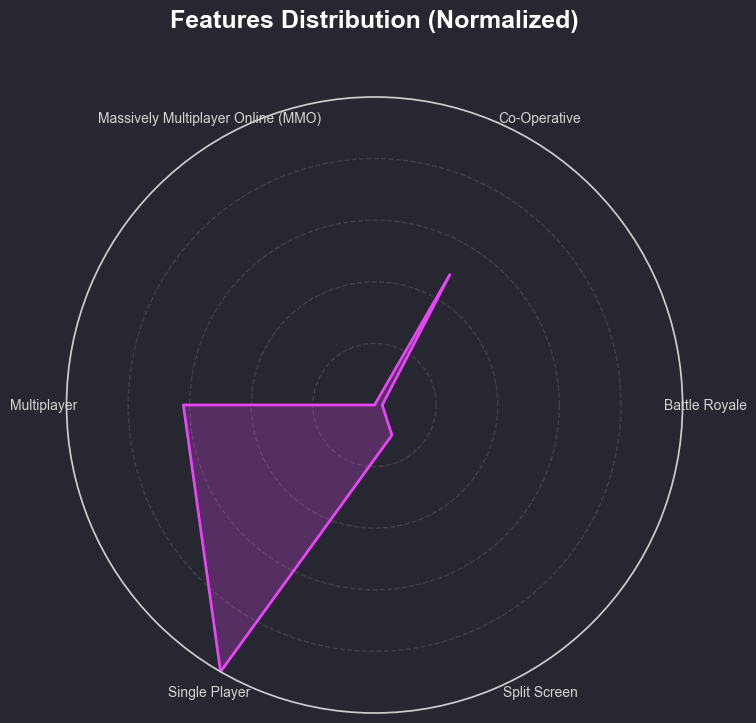

In [393]:
plot_all_features_star(my_game_data, unique_Features_df)

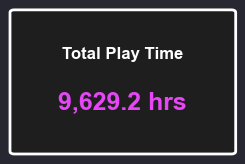

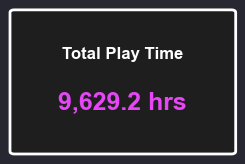

In [388]:
plot_total_playtime_card(my_game_data)

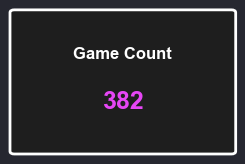

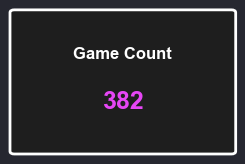

In [386]:
plot_game_count_card(my_game_data)

In [383]:
my_game_data.columns

Index(['Name', 'Sorting Name', 'Age Rating', 'Categories', 'Description',
       'Developers', 'Publishers', 'Favorite', 'Hidden', 'Features', 'Game Id',
       'Genres', 'Install size', 'Release Date', 'Added', 'Last Played',
       'Date Modified', 'Recent Activity', 'Platforms', 'Play Count',
       'Time Played', 'Sources', 'Series', 'Tags', 'Community Score',
       'Critic Score', 'User Score', 'Id'],
      dtype='object')

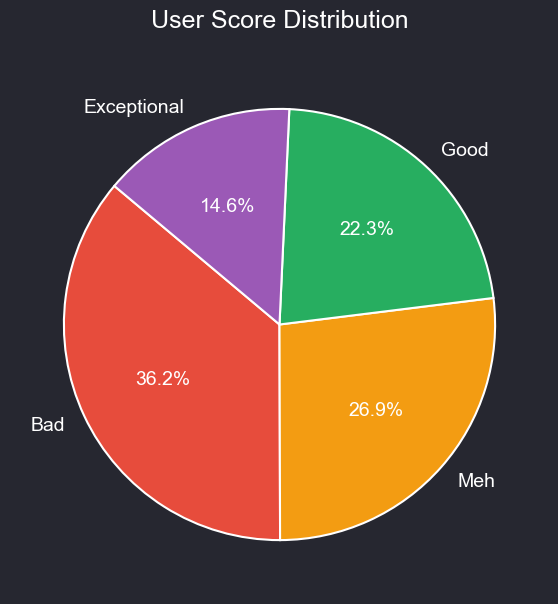

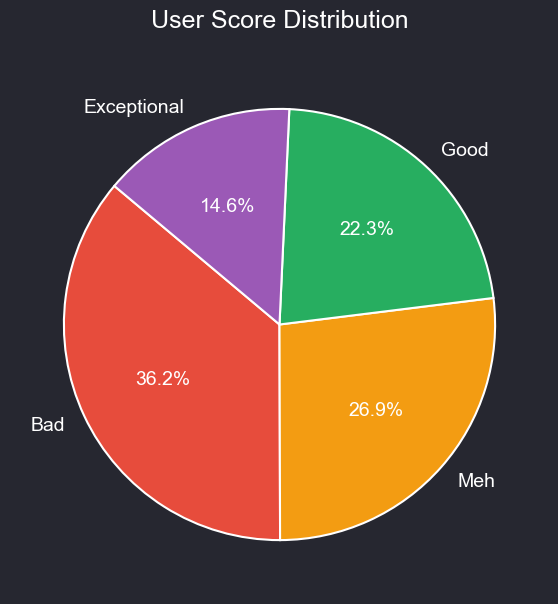

In [380]:
plot_user_score_pie(my_game_data)

# Output

In [ ]:
plot_top_5_genres_star(my_game_data, unique_genres_df)

KeyError: 'Genre'

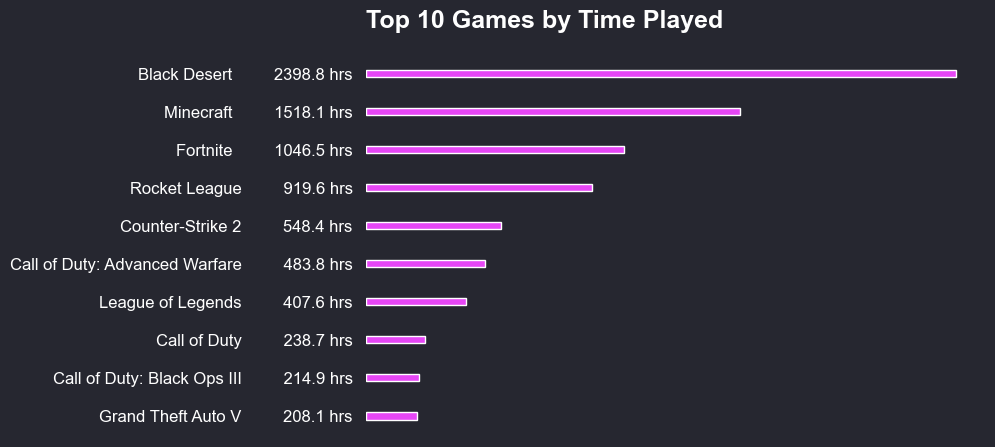

In [370]:
plot_top_10_games_by_time_played(my_game_data)

C:\Users\ibrah\AppData\Local\Temp\ipykernel_8832\3179498141.py:8: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



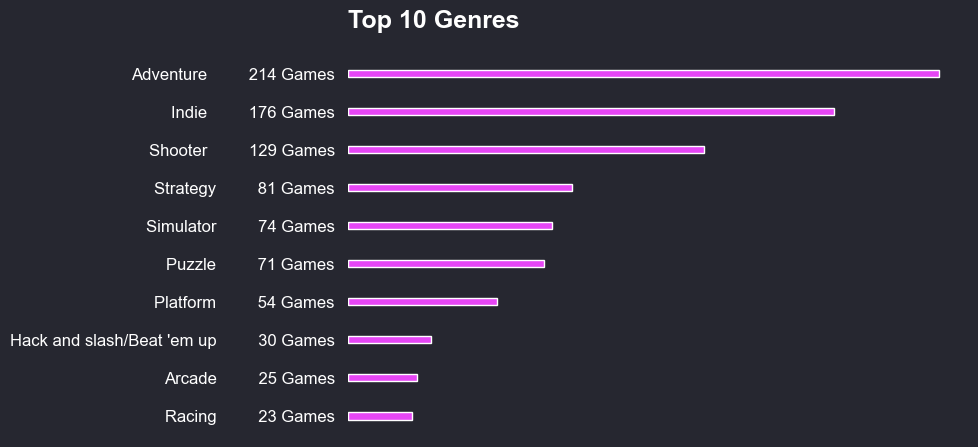

In [371]:
plot_top_5_genres_with_custom_title(my_game_data, unique_genres_df)


<module 'matplotlib.pyplot' from 'C:\\Users\\ibrah\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\matplotlib\\pyplot.py'>

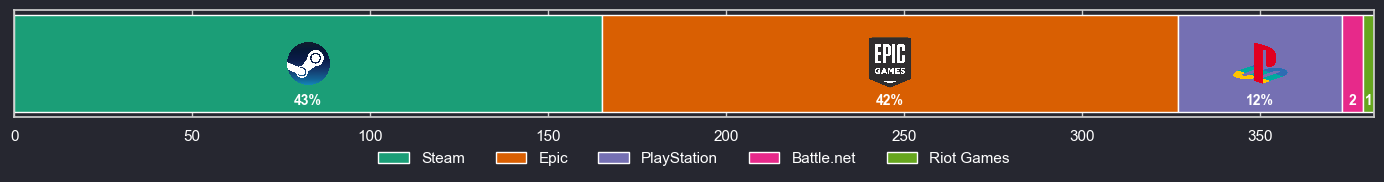

In [320]:
platform_distribution(my_game_data)

C:\Users\ibrah\AppData\Local\Temp\ipykernel_8832\2462093744.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



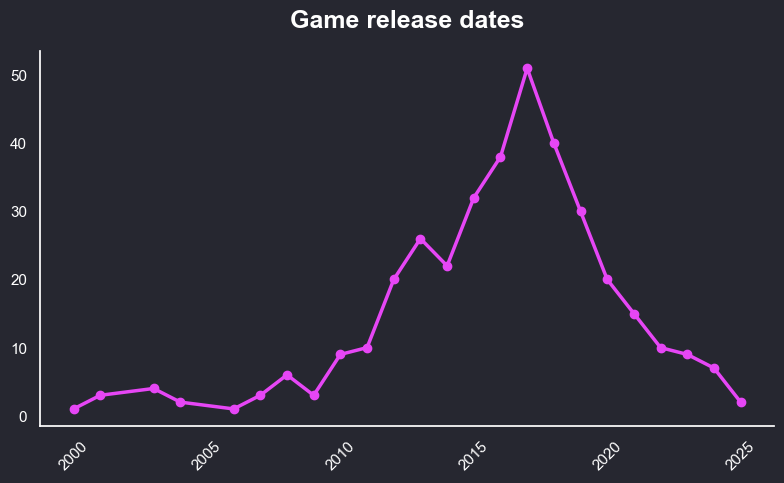

In [336]:
plot_games_over_time(my_game_data)

In [337]:
my_game_data.columns

Index(['Name', 'Sorting Name', 'Age Rating', 'Categories', 'Description',
       'Developers', 'Publishers', 'Favorite', 'Hidden', 'Features', 'Game Id',
       'Genres', 'Install size', 'Release Date', 'Added', 'Last Played',
       'Date Modified', 'Recent Activity', 'Platforms', 'Play Count',
       'Time Played', 'Sources', 'Series', 'Tags', 'Community Score',
       'Critic Score', 'User Score', 'Id'],
      dtype='object')